# 7. Sampling and Reconstruction of Signals: Analysis of Aliasing Effects and Proper Signal Reconstruction

## Example 1: Demonstration of Aliasing

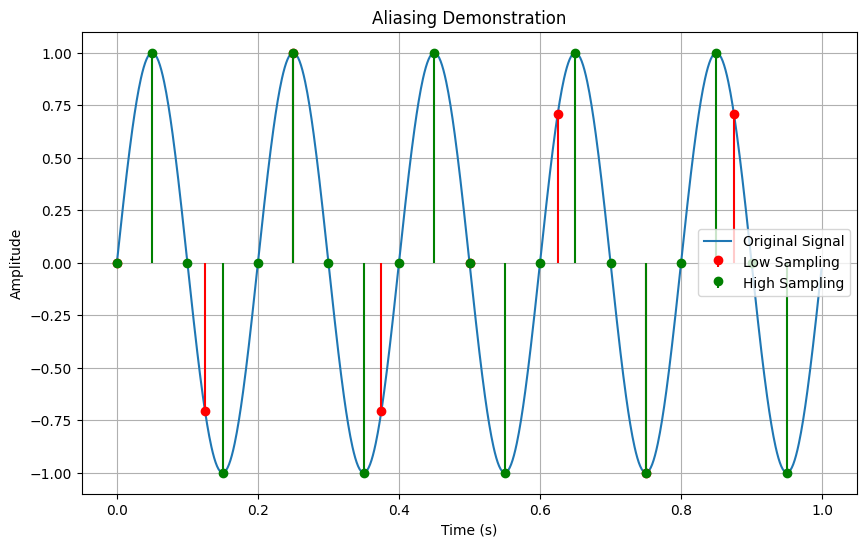

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Original signal parameters
f_signal = 5  # Frequency of the signal (Hz)
t = np.linspace(0, 1, 1000, endpoint=False)  # Time vector
signal = np.sin(2 * np.pi * f_signal * t)  # Original signal

# Sampling parameters
f_sample_low = 8  # Low sampling frequency (Hz)
f_sample_high = 20  # High sampling frequency (Hz)

# Sampling the signal
t_low = np.arange(0, 1, 1 / f_sample_low)
t_high = np.arange(0, 1, 1 / f_sample_high)
samples_low = np.sin(2 * np.pi * f_signal * t_low)
samples_high = np.sin(2 * np.pi * f_signal * t_high)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.stem(t_low, samples_low, linefmt='r-', markerfmt='ro', basefmt=" ", label='Low Sampling')
plt.stem(t_high, samples_high, linefmt='g-', markerfmt='go', basefmt=" ", label='High Sampling')
plt.title('Aliasing Demonstration')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## Example 2: Signal Reconstruction

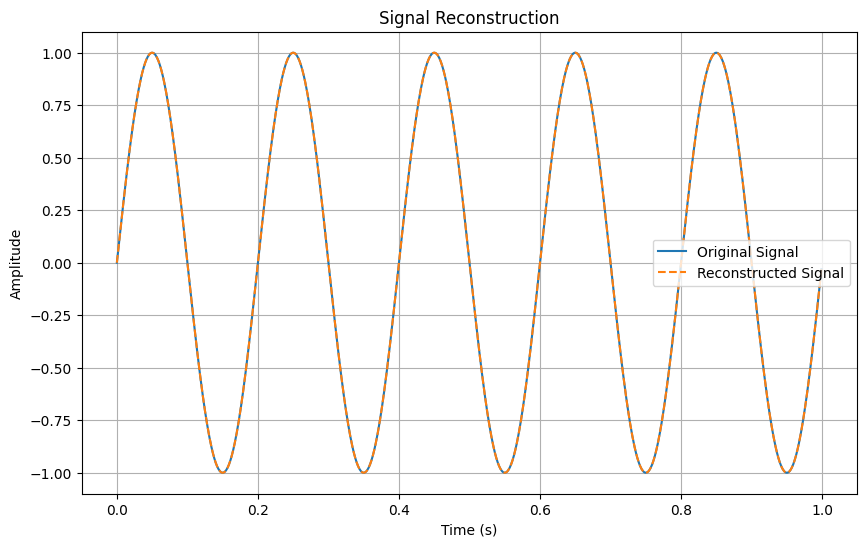

In [47]:
from scipy.signal import resample

# Reconstructing the signal using high sampling rate
num_samples = 1000
reconstructed_signal = resample(samples_high, num_samples)

# Plotting the reconstruction
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, reconstructed_signal, label='Reconstructed Signal', linestyle='--')
plt.title('Signal Reconstruction')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Constructing Different Types of Waves

## Sine Wave

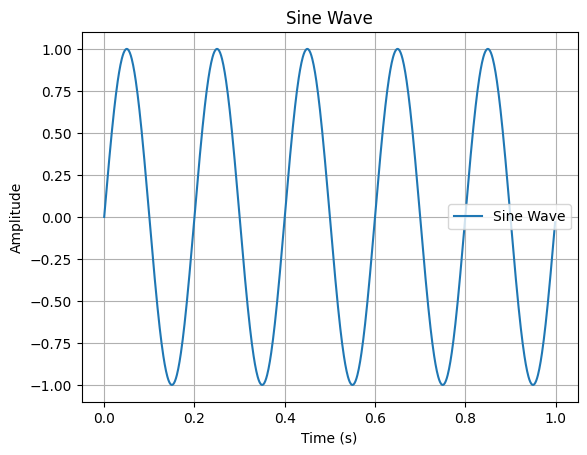

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
f = 5  # Frequency (Hz)
t = np.linspace(0, 1, 1000, endpoint=False)  # Time vector
sine_wave = np.sin(2 * np.pi * f * t)

# Plotting
plt.plot(t, sine_wave, label="Sine Wave")
plt.title("Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

## Cosine Wave

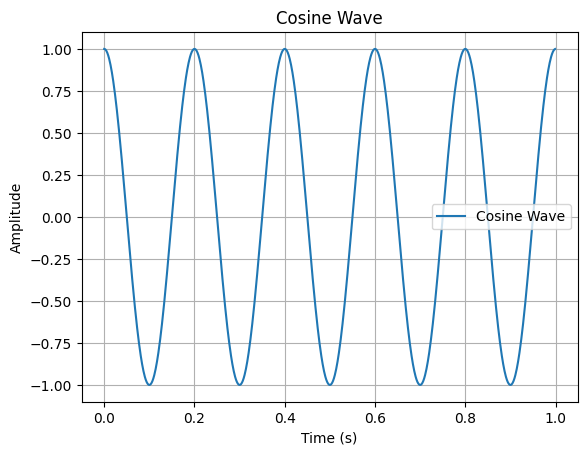

In [49]:
# Cosine wave
cosine_wave = np.cos(2 * np.pi * f * t)

# Plotting
plt.plot(t, cosine_wave, label="Cosine Wave")
plt.title("Cosine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

## Square Wave

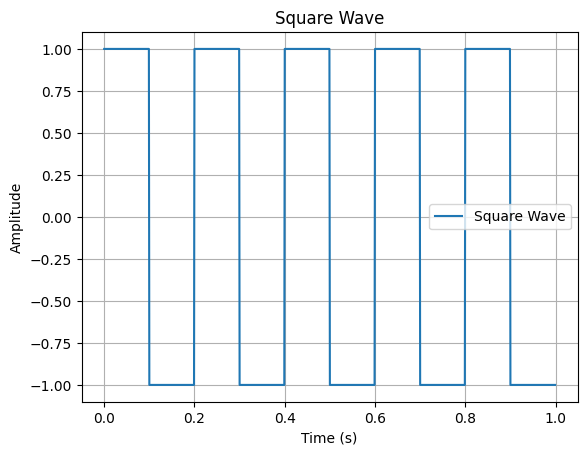

In [50]:
from scipy.signal import square

# Square wave
square_wave = square(2 * np.pi * f * t)

# Plotting
plt.plot(t, square_wave, label="Square Wave")
plt.title("Square Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

## Triangular Wave

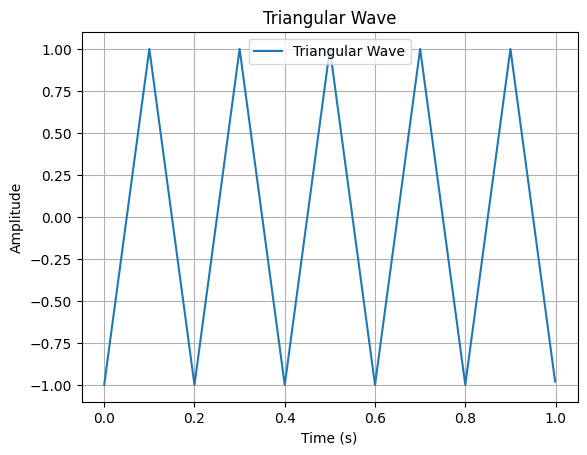

In [51]:
from scipy.signal import sawtooth

# Triangular wave (modification of sawtooth wave)
triangular_wave = sawtooth(2 * np.pi * f * t, width=0.5)

# Plotting
plt.plot(t, triangular_wave, label="Triangular Wave")
plt.title("Triangular Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

## Sawtooth Wave

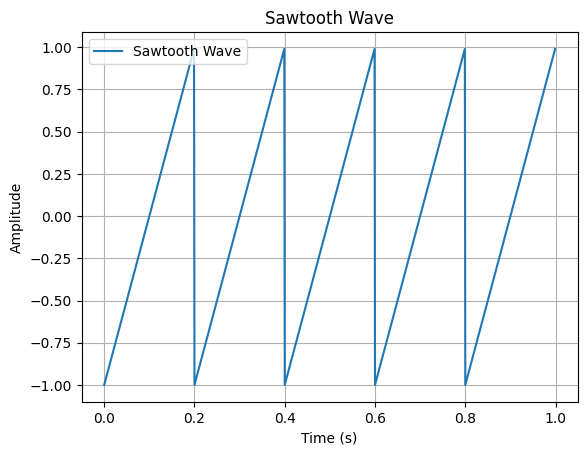

In [52]:
# Sawtooth wave
sawtooth_wave = sawtooth(2 * np.pi * f * t)

# Plotting
plt.plot(t, sawtooth_wave, label="Sawtooth Wave")
plt.title("Sawtooth Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

## Mixed signal: sum of sine and cosine waves

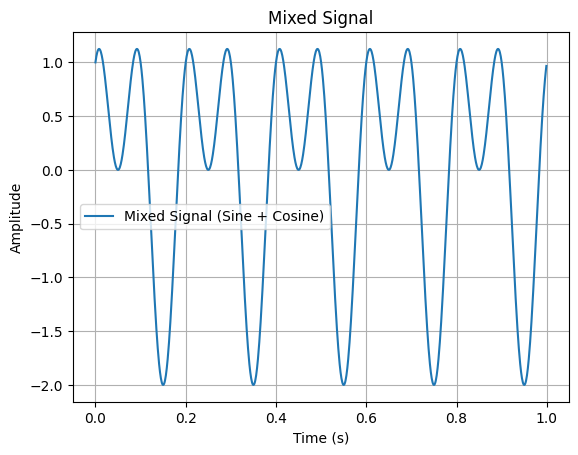

In [53]:
f1 = 5  # Frequency of sine wave
f2 = 10  # Frequency of cosine wave
mixed_signal = np.sin(2 * np.pi * f1 * t) + np.cos(2 * np.pi * f2 * t)

# Plotting
plt.plot(t, mixed_signal, label="Mixed Signal (Sine + Cosine)")
plt.title("Mixed Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

# Coding and Decoding Digital Signals

## Delta Encoding and Decoding

Delta encoding represents differences between consecutive signal samples.

In [54]:
import numpy as np

# Delta Encoding
def delta_encode(signal):
    return np.diff(np.insert(signal, 0, signal[0]))

# Delta Decoding
def delta_decode(encoded_signal):
    return np.cumsum(encoded_signal)

# Example
original_signal = [1, 2, 2, 3, 5, 8]
encoded_signal = delta_encode(original_signal)
decoded_signal = delta_decode(encoded_signal)

print("Original Signal:", original_signal)
print("Encoded Signal:", encoded_signal)
print("Decoded Signal:", decoded_signal)

Original Signal: [1, 2, 2, 3, 5, 8]
Encoded Signal: [0 1 0 1 2 3]
Decoded Signal: [0 1 1 2 4 7]


## Quantization of Signal Samples
Quantization reduces the precision of signal samples to save storage or bandwidth.

In [55]:
def quantize(signal, levels):
    min_val, max_val = min(signal), max(signal)
    step_size = (max_val - min_val) / levels
    quantized_signal = np.round((signal - min_val) / step_size) * step_size + min_val
    return quantized_signal

# Example
original_signal = np.array([1.1, 2.3, 2.9, 3.7, 5.1])
quantized_signal = quantize(original_signal, levels=3)

print("Original Signal:", original_signal)
print("Quantized Signal:", quantized_signal)

Original Signal: [1.1 2.3 2.9 3.7 5.1]
Quantized Signal: [1.1        2.43333333 2.43333333 3.76666667 5.1       ]


## Reconstructing Signals After Compression

In [56]:
#This example demonstrates signal reconstruction after compression using a simple DCT.
from scipy.fftpack import dct, idct

# Apply Discrete Cosine Transform (DCT)
def apply_dct(signal):
    return dct(signal, norm='ortho')

# Reconstruct signal using inverse DCT
def reconstruct_signal(dct_signal, threshold):
    dct_signal[np.abs(dct_signal) < threshold] = 0
    return idct(dct_signal, norm='ortho')

# Example
original_signal = np.array([1, 2, 3, 4, 5, 6, 7, 8])
dct_signal = apply_dct(original_signal)
reconstructed_signal = reconstruct_signal(dct_signal, threshold=5)

print("Original Signal:", original_signal)
print("Compressed Signal:", dct_signal)
print("Reconstructed Signal:", np.round(reconstructed_signal, 2))

Original Signal: [1 2 3 4 5 6 7 8]
Compressed Signal: [12.72792206 -6.44232302  0.          0.          0.          0.
  0.          0.        ]
Reconstructed Signal: [1.34 1.82 2.71 3.87 5.13 6.29 7.18 7.66]


## Trade-off Analysis Between Compression Ratio and Signal Distortion

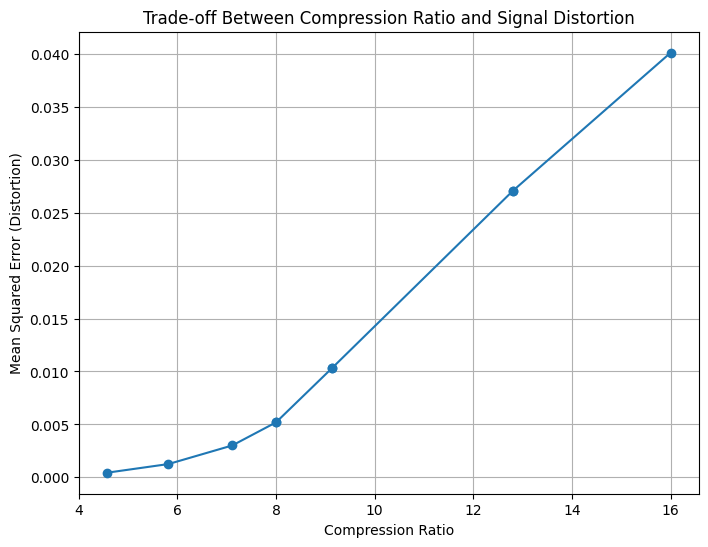

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

# Original Signal
N = 64  # Number of samples
t = np.linspace(0, 1, N)
signal = np.sin(2 * np.pi * 5 * t)  # Example sine wave

# Function for compression, reconstruction, and analysis
def analyze_tradeoff(signal, thresholds):
    original_size = len(signal)
    results = {"thresholds": [], "compression_ratios": [], "distortions": []}

    for threshold in thresholds:
        # Apply DCT
        dct_coeffs = dct(signal, norm='ortho')

        # Apply Thresholding (Compression)
        compressed_coeffs = np.where(abs(dct_coeffs) > threshold, dct_coeffs, 0)

        # Calculate Compression Ratio
        compressed_size = np.count_nonzero(compressed_coeffs)
        compression_ratio = original_size / compressed_size

        # Reconstruct Signal
        reconstructed_signal = idct(compressed_coeffs, norm='ortho')

        # Calculate Distortion (MSE)
        mse = np.mean((signal - reconstructed_signal) ** 2)

        # Store Results
        results["thresholds"].append(threshold)
        results["compression_ratios"].append(compression_ratio)
        results["distortions"].append(mse)

    return results

# Perform Analysis for a Range of Thresholds
thresholds = np.linspace(0.1, 1.0, 10)  # Threshold values
results = analyze_tradeoff(signal, thresholds)

# Plot Compression Ratio vs. Distortion
plt.figure(figsize=(8, 6))
plt.plot(results["compression_ratios"], results["distortions"], marker='o')
plt.title("Trade-off Between Compression Ratio and Signal Distortion")
plt.xlabel("Compression Ratio")
plt.ylabel("Mean Squared Error (Distortion)")
plt.grid()
plt.show()


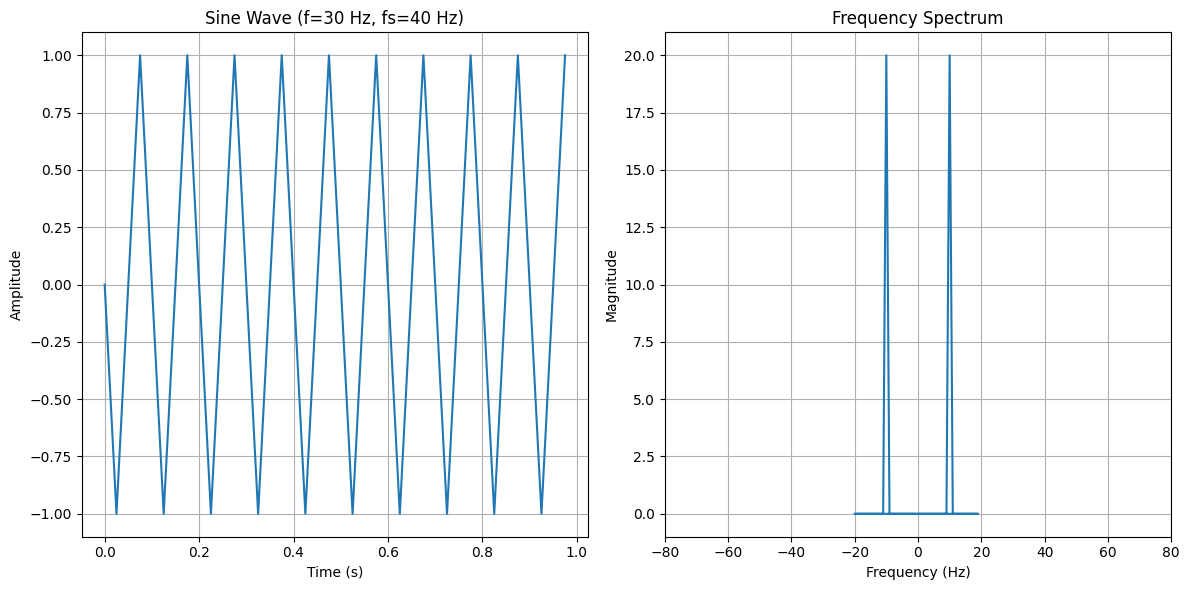

Nyquist Frequency: 20.0 Hz
Aliasing occurs because signal frequency > Nyquist frequency.
The aliased frequency appears at: 30 Hz


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
f = 30  # Hz (signal frequency)
fs = 40 # Hz (sampling frequency)
duration = 1  # second
t = np.linspace(0, duration, int(fs*duration), endpoint=False) # Time vector

# Generate the sine wave
signal = np.sin(2 * np.pi * f * t)

# Frequency domain representation
freqs = np.fft.fftfreq(len(signal), 1/fs)
fft_signal = np.fft.fft(signal)

# Plotting
plt.figure(figsize=(12, 6))

# Time domain plot
plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.title(f'Sine Wave (f={f} Hz, fs={fs} Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Frequency domain plot
plt.subplot(1, 2, 2)
plt.plot(freqs, np.abs(fft_signal))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-80, 80)  # Focus on relevant frequencies
plt.grid(True)

plt.tight_layout()
plt.show()

# Aliasing Analysis
nyquist_frequency = fs / 2
print(f"Nyquist Frequency: {nyquist_frequency} Hz")

if f > nyquist_frequency:
    print("Aliasing occurs because signal frequency > Nyquist frequency.")
    aliased_frequency = f % fs
    print(f"The aliased frequency appears at: {aliased_frequency} Hz")
else:
    print("Aliasing does not occurs.")

In [59]:
signal = np.array([0.3, 0.8, 1.2, 1.9, 2.7])
levels = 5

# 1. Find the Range
min_val = np.min(signal)
max_val = np.max(signal)
signal_range = max_val - min_val

# 2. Determine Step Size
delta = signal_range / levels

# 3. Define Quantization Levels
quant_levels = np.linspace(min_val + delta/2, max_val - delta/2, levels) # Mid-rise quantizer

# 4. Quantize the Signal
quantized_signal = np.zeros_like(signal)
for i in range(len(signal)):
    closest_level_idx = np.argmin(np.abs(quant_levels - signal[i]))
    quantized_signal[i] = quant_levels[closest_level_idx]

# 5. Calculate Quantization Error
quantization_error = signal - quantized_signal

# Print the results
print("Original Signal:", signal)
print("Quantization Levels:", quant_levels)
print("Quantized Signal:", quantized_signal)
print("Quantization Error:", quantization_error)

Original Signal: [0.3 0.8 1.2 1.9 2.7]
Quantization Levels: [0.54 1.02 1.5  1.98 2.46]
Quantized Signal: [0.54 1.02 1.02 1.98 2.46]
Quantization Error: [-0.24 -0.22  0.18 -0.08  0.24]
